# MLR: Assumptions, Model Diagnostics, and Model Evaluation

#### Author: Kunyu He, CAPP'20

## 0. Preparation

In [1]:
import sys

sys.path.append("../../codes/")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
from sklearn.datasets import load_diabetes

import utils

In [5]:
df_dict = load_diabetes()
print((df_dict['DESCR']))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

>Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline ([link](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html))

In [6]:
X = pd.DataFrame(df_dict['data'], columns=df_dict['feature_names'])
y = df_dict['target']

In [7]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


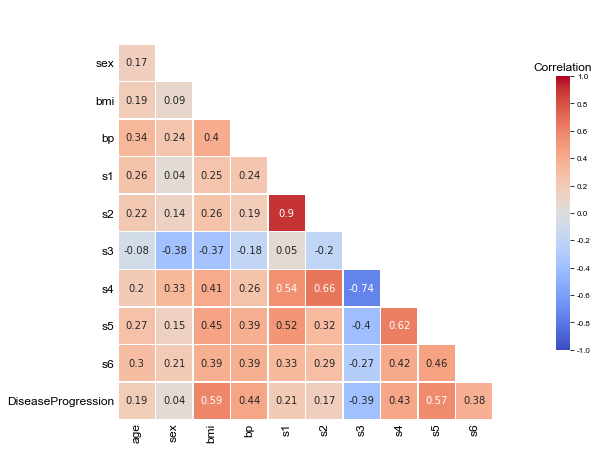

In [10]:
labels = list(X.columns) + ['DiseaseProgression']

fig, ax = plt.subplots(figsize=(9, 8))
utils.corr_plot(ax, np.corrcoef(np.c_[X.values, y].T), labels=labels,
                triangle=True, upper=False, annot_size=10)
fig.tight_layout()

In [11]:
X_ = sm.add_constant(X)

model = sm.OLS(y, X_).fit()
print((model.summary()))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           3.83e-62
Time:                        20:32:14   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

D:\Anaconda\envs\teaching\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1. MLR Assumtions and Model Diagnostics

Wooldridge, Introductory Econometrics

### MLR.1 Linear in Parameters

**Population model** can be written as:

$$y=\beta_0+\beta_1x_1+...+\beta_kx_k+\mu$$

where $\beta_0, \beta_1, ..., \beta_k$ are the unknown **parameters** (constants) of interest and $\mu$ is an observed random error or disturbance term.

Note that $y$ and $x_i$ can take any functional form like natural logarithms ($i=1, 2, ..., k$).

#### Testing

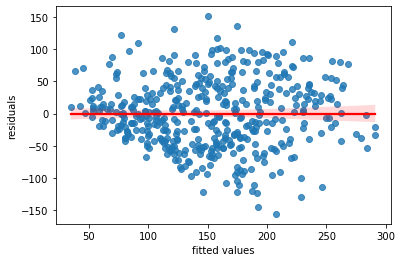

In [14]:
predicted = model.predict(X_)
sns.regplot(x=predicted, y=model.resid, line_kws={'color': "red"});
plt.ylabel("residuals");
plt.xlabel("fitted values");

### MLR. 2 Random Sampling

The sample of n observations is a random sample following the population model.

#### Testing

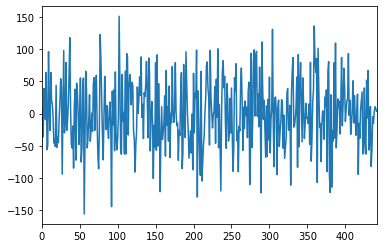

In [16]:
model.resid.plot();

### MLR. 3 No Perfect Collinearity

In the sample, none of the independent variables is constant and there are no exact linear relationships among the independent variables.

#### Testing:

In [19]:
X.var(axis=0)

age    0.002268
sex    0.002268
bmi    0.002268
bp     0.002268
s1     0.002268
s2     0.002268
s3     0.002268
s4     0.002268
s5     0.002268
s6     0.002268
dtype: float64

In [22]:
for col in X.columns:
    y_ = X[col]
    X_sub = X[[c for c in X.columns if c != col]]
    m = sm.OLS(y_, X_sub)
    r2 = m.fit().rsquared
    print("{}: R^2 = {:.3f}".format(col, r2))
    if r2 == 1:
        print("%s violates MLR. 3." % col)

age: R^2 = 0.179
sex: R^2 = 0.218
bmi: R^2 = 0.338
bp: R^2 = 0.315
s1: R^2 = 0.983
s2: R^2 = 0.974
s3: R^2 = 0.935
s4: R^2 = 0.888
s5: R^2 = 0.901
s6: R^2 = 0.326


#### Why is multicollinearity harmful?

In [36]:
X_test = X.copy(deep=True)
X_test = X_test.applymap(lambda ele: ele*X_test.shape[0])

In [37]:
X_test['s7'] = X_test.age + X_test.sex

model_test = sm.OLS(y, X_test).fit()
print((model_test.summary()))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              5.100
Date:                Fri, 03 Apr 2020   Prob (F-statistic):                    4.72e-07
Time:                        21:11:18   Log-Likelihood:                         -2873.9
No. Observations:                 442   AIC:                                      5768.
Df Residuals:                     432   BIC:                                      5809.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Linear algebra perspective: [Kunyu's blog](https://towardsdatascience.com/ridge-regression-and-multicollinearity-d8a3e06efce8).

In [38]:
X_test = X_test.values

np.linalg.inv(X_test.T @ X_test)

array([[-5.38197582e+09, -5.38197582e+09, -1.37104638e-06,
        -1.11127006e-06, -2.68714243e-05,  1.97856328e-05,
         1.19304883e-05,  6.35569138e-06,  8.69692621e-06,
         5.44896639e-07,  5.38197582e+09],
       [-5.38197582e+09, -5.38197582e+09, -3.96141098e-07,
        -1.13160898e-06, -2.55077061e-05,  1.97271112e-05,
         1.38056771e-05,  4.72511834e-06,  9.93945627e-06,
         9.40511650e-07,  5.38197582e+09],
       [-1.39981321e-06, -4.24907926e-07,  7.72632541e-06,
        -1.83253694e-06,  3.32293162e-06, -3.69346720e-06,
         8.81703474e-07,  4.30572478e-07, -2.80408155e-06,
        -1.15540901e-06,  1.44011631e-06],
       [-1.10377998e-06, -1.12411889e-06, -1.83253694e-06,
         7.47030457e-06, -1.76737091e-06,  9.02018100e-07,
         8.02040088e-07,  1.67307886e-06, -1.11144729e-06,
        -1.18716845e-06, -1.93574446e-07],
       [-2.71487238e-05, -2.57850056e-05,  3.32293162e-06,
        -1.76737091e-06,  3.03043476e-04, -2.37187069e-04,
  

### MLR. 4 Zero Conditional Mean

The error $\mu$ has an expected value of zero given any values of the independent variables. In other words,

$$E(\mu|X)=0$$

**UNBIASED ESTIMATES WITH MLR. 1 THROUGH MLR.4**

### MLR 5. Homoskedasticity

The error $\mu$ has the same variance given any value of the explanatory variables. In other words,

$$Var(\mu|X)=\sigma^2$$

**BLUE: LOWEST VARIANCE AMONG ALL UNBIASED ESTIMATES**

### MLR 6. Normality

The population error $\mu$ is independent of the explanatory variables and:

$$\mu \sim N(0, \sigma^2)$$

#### Testing

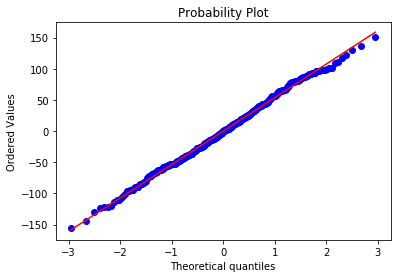

In [40]:
probplot(model.resid, dist='norm', plot=pylab);

In [40]:
from scipy.stats import jarque_bera

In [41]:
jarque_bera(model.resid)

(1.4036025316898297, 0.49569162676119116)

## 2. Model Evaluation